In [1]:
# 加载画图包
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

# setting color palette
# pal = sns.color_palette("Paired")
# sns.set_palette(pal)
# sns.palplot(pal)

In [2]:
import pandas as pd

In [3]:
# 读取代表性转录本gene_model
araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed'
araport11_isoform = pd.read_csv(araport11_isoform_path, sep='\t', 
                                names=['chrom', 'chromStart', 'chromEnd', 'name', 
                                       'score', 'strand', 'thickStart', 'thickEnd', 
                                       'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
                               )
araport11_isoform['gene_id'] = araport11_isoform['name'].map(lambda x: x.split('.')[0])
araport11_isoform.set_index('gene_id', inplace=True)

In [4]:
import sys
sys.path.append('/public/home/mowp/workspace/termination/cbRNA_pool/script/')

In [5]:
%load_ext autoreload
%autoreload 1
%aimport igv

# Example

## multi-bam

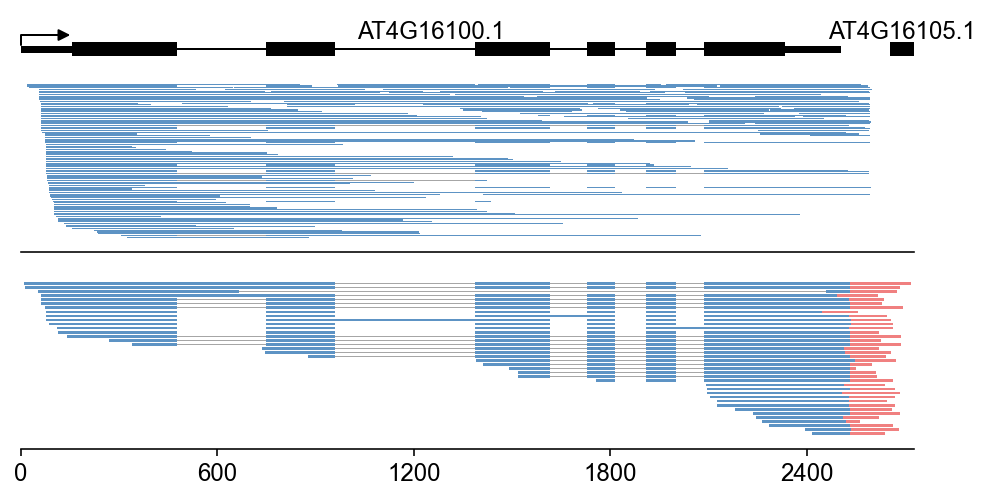

In [6]:
chrom, start, end, strand = '4', 9105653, 9108381, '+'
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)


infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'
igv_plot.add_bam(
    infile,
)

igv_plot.plot(height=4, width=8, gene_track_height=1)

# plt.savefig('a.svg')

## tendem gene

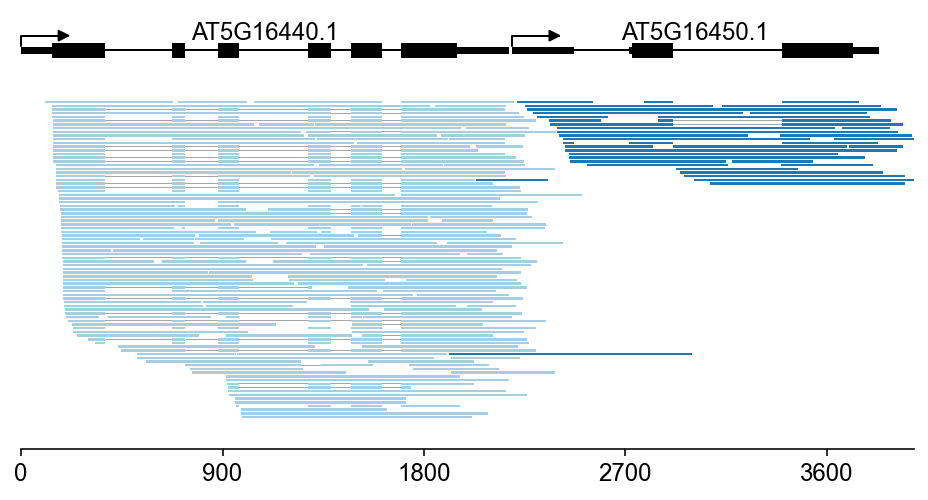

In [9]:
chrom, start, end, strand = '5', 5371627, 5375616, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT5G16440.1', 'AT5G16450.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    gene_list = {'AT5G16440', 'AT5G16450'},
    # method='3_end',
)

igv_plot.plot(height=4, width=8)

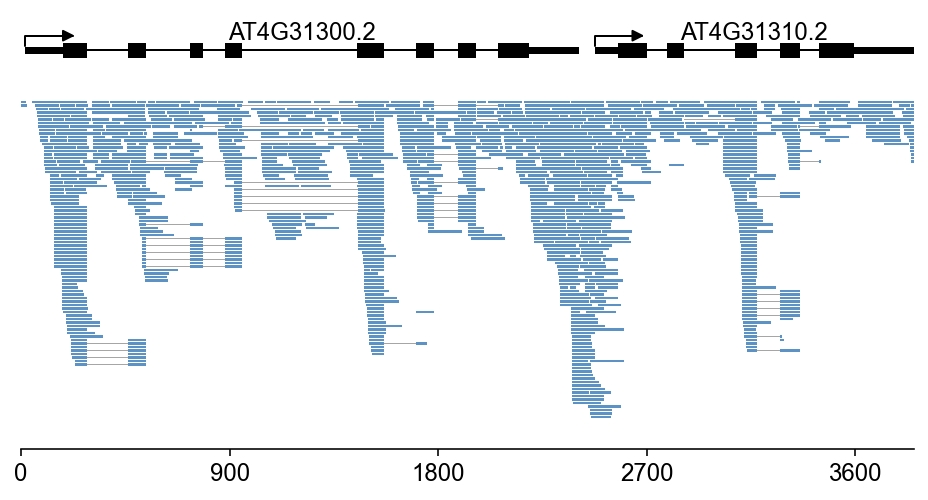

In [87]:
chrom, start, end, strand = '4', 15188744, 15192596, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    #gene_list = {'AT5G16440.1', 'AT5G16450.1'},
)

infile = '/public/home/lab-zhai/edit_share/jbrowse/tair10/Kindgren_2019_GSE131733/s01_WT_RT_rep1/aligned_data/s01_WT_RT_rep1.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {'AT5G16440', 'AT5G16450'},
    # method='3_end',
)

igv_plot.plot(height=4, width=8)
plt.savefig('a.svg')

## with gene_id

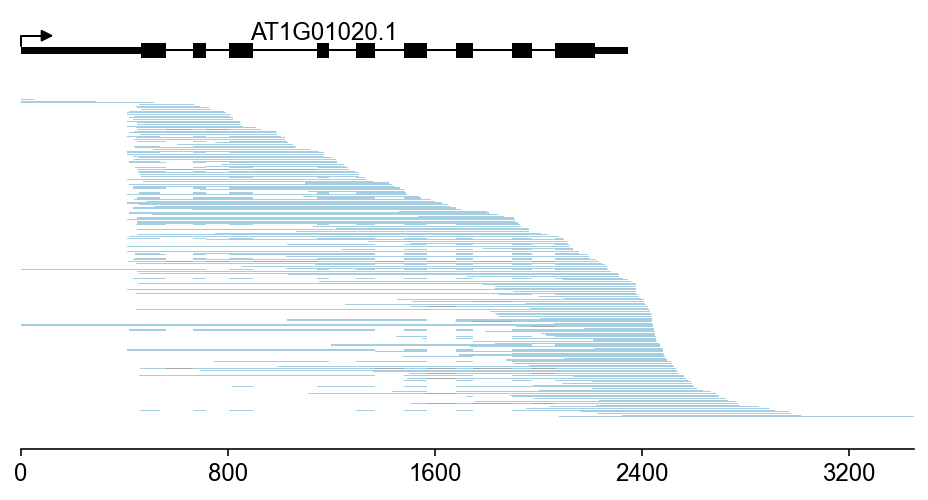

In [89]:
# get gene info
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT1G01020']
gene_id = mRNA_id.split('.')[0]

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    # gene_list = {mRNA_id},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='3_end',
)

igv_plot.plot(height=4, width=8, extend_xlim_end=True)

# forward strand vs reverse strand

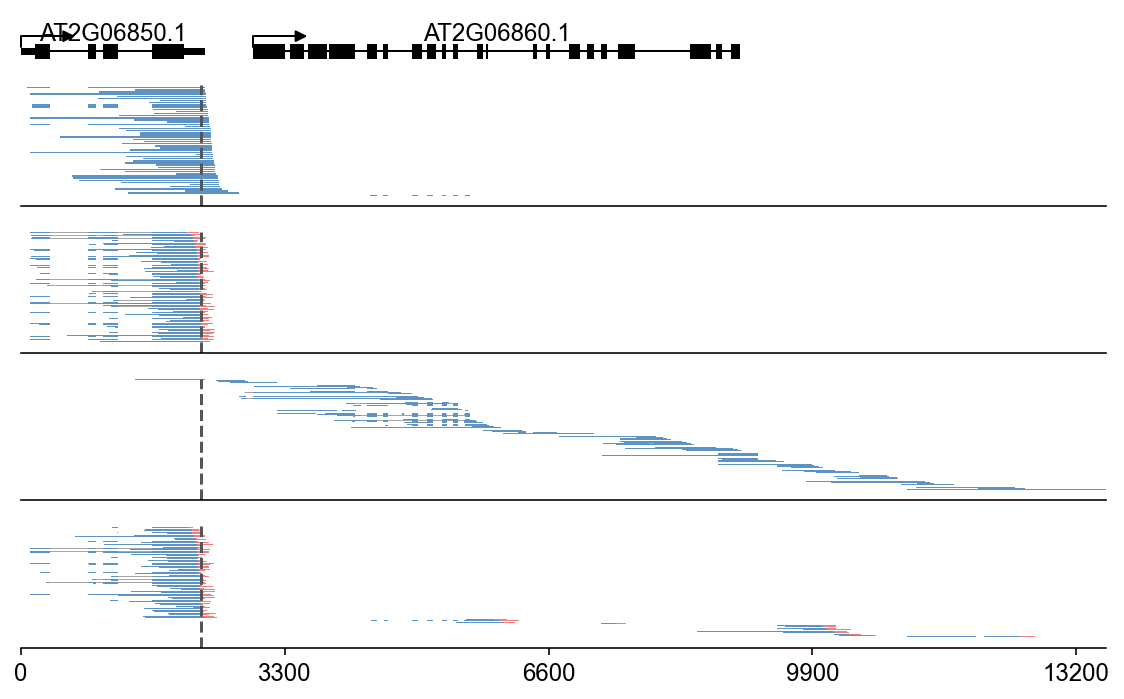

In [99]:
# get gene info
# for fwd strand
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT2G06850']
end = 2775535

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    # gene_list = {mRNA_id},
)

pas_site = 2765696

infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'

igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    end_after=pas_site+50,
#     start_before=pas_site,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'

igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
#     end_after=pas_site+50,
#     start_before=pas_site,
    filter_strand = strand,
)


infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    end_after=pas_site+50,
#     start_before=pas_site,
    filter_strand = strand,
)


infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
#     start_after=pas_site,
#     start_before=pas_site,
    filter_strand = strand,
)

igv_plot.plot(
    height=5, width=8,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)
plt.tight_layout()
plt.savefig('a.svg')

In [ ]:
for i in igv_plot.bam_list:
    print(len(i))

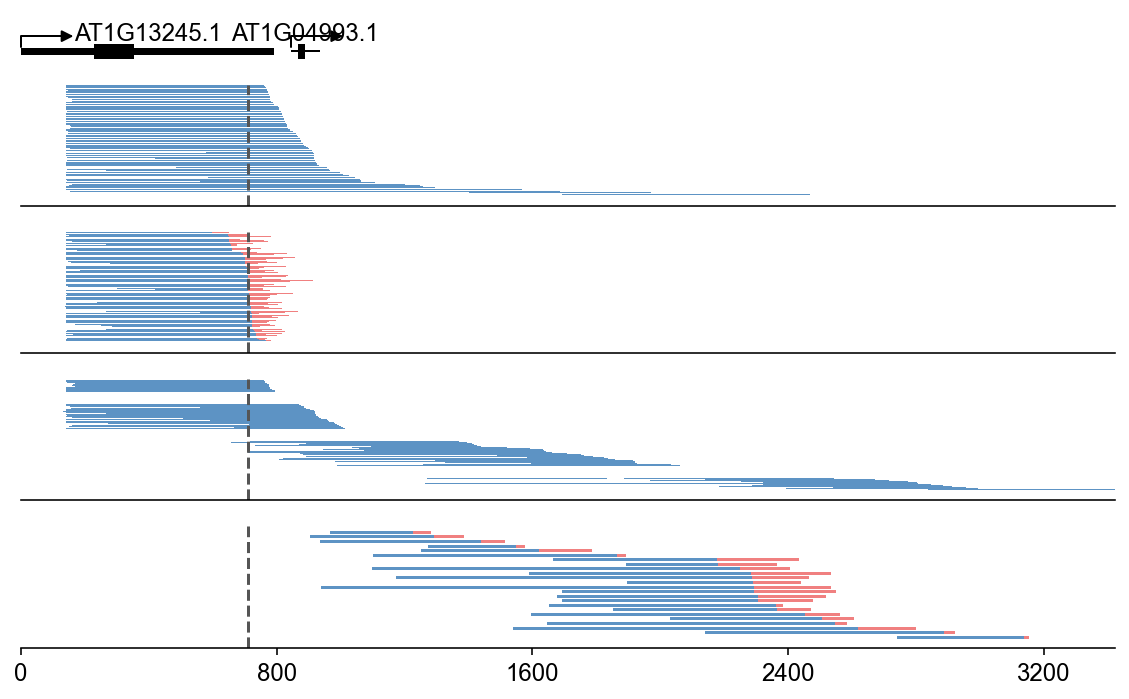

In [100]:
# get gene info
# for reverse strand sgene
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT1G13245']
start = 4523262

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    # gene_list = {mRNA_id},
)

pas_site = 4525495

infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/elongating_data/20210324_col_nuclear.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    start_before=pas_site-50,
    # end_after=pas_site+50,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    # end_before=pas_site,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    start_before=pas_site-50,
    # end_after=pas_site+50,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    end_before=pas_site-50,
    filter_strand = strand,
)

igv_plot.plot(
    height=5, width=8,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)
plt.tight_layout()
plt.savefig('a.svg')

In [135]:
for i in igv_plot.bam_list:
    print(len(i))

243
43
128
36


# rRNA

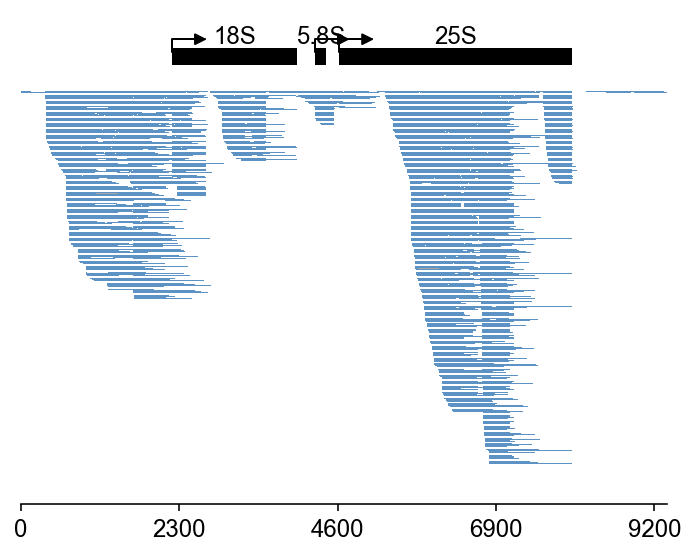

In [45]:
# get gene info
#chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT5G54075']
chrom, start, end, strand = '45S_At3', 1, 9377, '+'

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/data/ath_cbRNA/cbRNA_2/rRNA/rRNA.all.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/data/ath_cbRNA/cbRNA_3/rRNA/cb3_rRNA.sorted.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='continuous',
    subsample=.01
)

igv_plot.plot(
    height=4, width=5,
    #polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    #extend_xlim_end=True,
    gene_track_height=.5
)
plt.tight_layout()
plt.savefig('a.svg')

# long terminaiton window vs short termination window

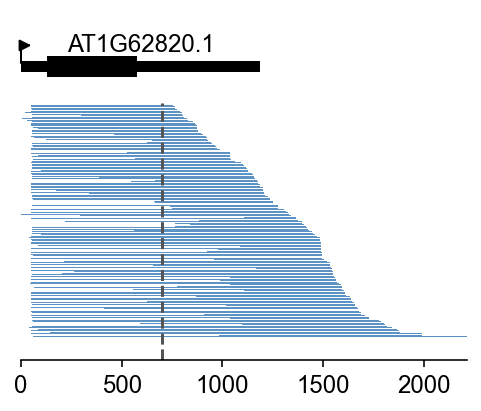

In [12]:
# get gene info
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT1G62820']
gene_id = mRNA_id.split('.')[0]
pas = 23263699

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    filter_strand = strand,
    #end_after = pas+50
    start_before=pas-50,
    start_after=pas-3000
)

# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/cbRNA.polyadenylated.bam'
# igv_plot.add_bam(
#     infile,
#     #gene_list = {gene_id},
#     method='3_end',
#     filter_strand = strand,
# )

igv_plot.plot(
    height=3, width=3.5,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1
)
plt.tight_layout()
plt.savefig('a.svg')

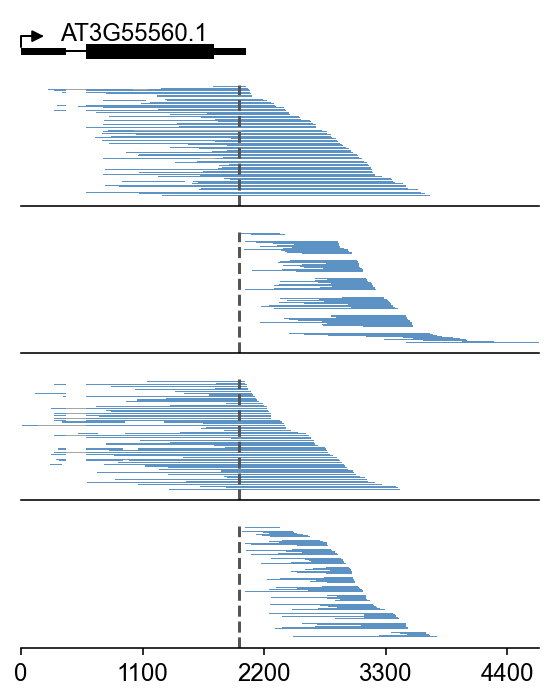

In [63]:
# get gene info
# for reverse strand sgene
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT3G55560']
start = 20602585

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

pas_site = 20604679

infile = '/public/home/mowp/test/nanopore_test/cbRNA_3/elongating_data/cbRNA_3.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    start_before=pas_site-50,
    end_after=pas_site+50,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/cbRNA_3/elongating_data/cbRNA_3.elongating.bam'
# infile = '/public/home/mowp/data/ath_nuclear_RNA/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    end_before=pas_site,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/cbRNA_2/elongating_data/cbRNA_2.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    start_before=pas_site-50,
    end_after=pas_site+50,
    filter_strand = strand,
)

infile = '/public/home/mowp/test/nanopore_test/cbRNA_2/elongating_data/cbRNA_2.elongating.bam'
# infile = '/public/home/mowp/data/ath_nuclear_RNA/20210324_col_nuclear/polyadenylated_data/20210324_col_nuclear.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    end_before=pas_site,
    filter_strand = strand,
)

igv_plot.plot(
    height=5, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)

plt.tight_layout()
plt.savefig('a.svg')

# splicing

n = 644
n = 78
n = 233
n = 1743


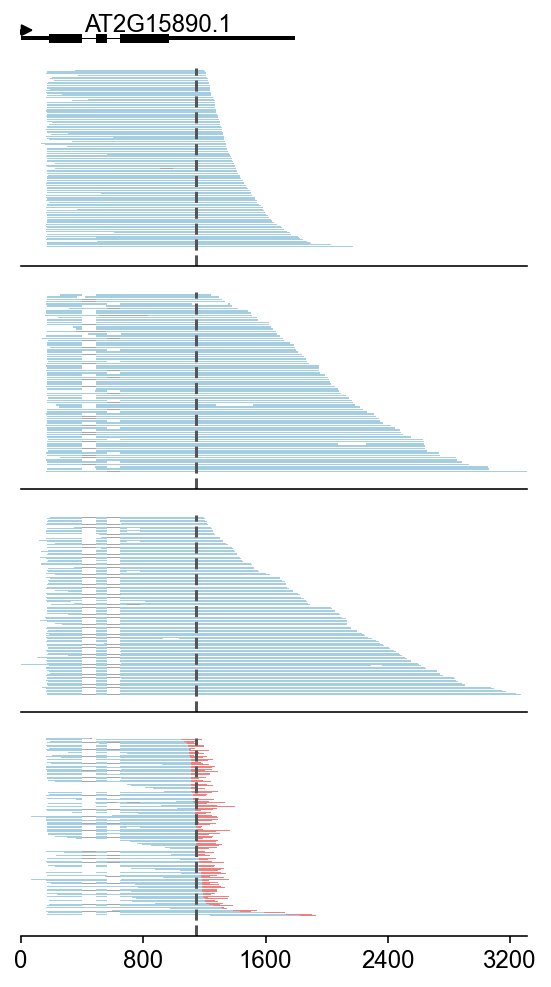

In [91]:
# get gene info
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT2G15890']
gene_id = mRNA_id.split('.')[0]

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='unspliced',
    start_before=6921018-50,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='partially_spliced',
    start_before=6921018-50,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='spliced',
    start_before=6921018-50,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/cbRNA.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='3_end',
)

igv_plot.plot(
    height=7, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 167
n = 45
n = 59
n = 1016


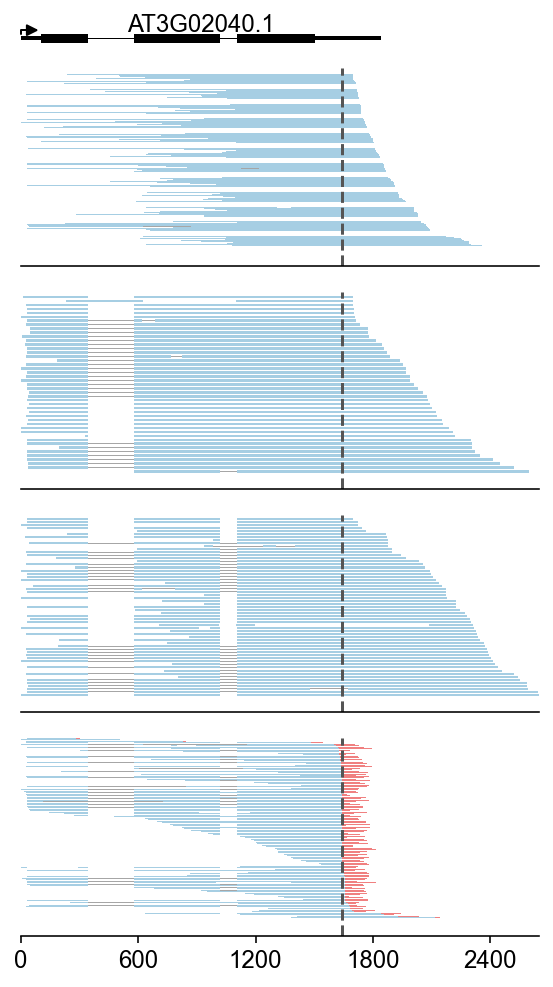

In [94]:
# get gene info
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT3G02040']
gene_id = mRNA_id.split('.')[0]

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

pas = 348365

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='unspliced',
    start_before=pas-50,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='partially_spliced',
    start_before=pas-50,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='spliced',
    start_before=pas-50,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/cbRNA.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='3_end',
)

igv_plot.plot(
    height=7, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

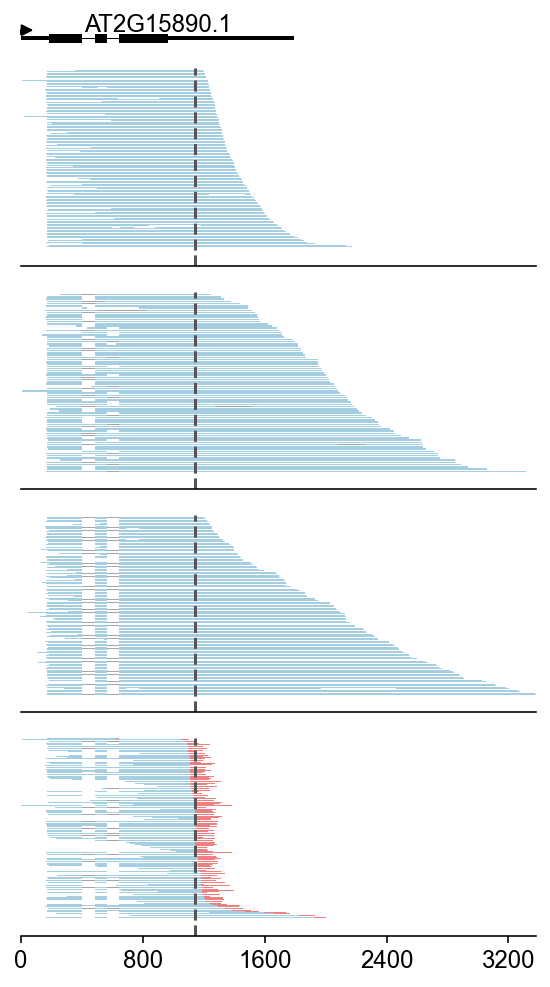

In [229]:
# get gene info
chrom, start, end, mRNA_id, _, strand, *_ = araport11_isoform.loc['AT2G15890']
gene_id = mRNA_id.split('.')[0]

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {mRNA_id},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='unspliced',
    start_before=6921018-50,
    splice_stats_dict=splice_stats_dict,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='partially_spliced',
    start_before=6921018-50,
    splice_stats_dict=splice_stats_dict,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='spliced',
    start_before=6921018-50,
    splice_stats_dict=splice_stats_dict,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'
igv_plot.add_bam(
    infile,
    gene_list = {gene_id},
    method='3_end',
)

igv_plot.plot(
    height=7, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
)
plt.tight_layout()
plt.savefig('a.svg')

# neighboring genes

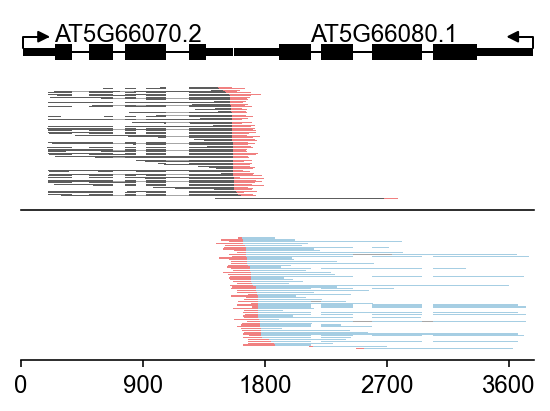

In [102]:
chrom, start, end, strand = '5', 26421670, 26425453, '+'
gene_id = 'AT5G66070'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'

igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT5G66070'},
)

igv_plot.add_bam(
    infile,
    method='5_end',
    gene_list={'AT5G66080'},
)

igv_plot.plot(
    height=3, width=4, 
    gene_track_height=1.5,
    #polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

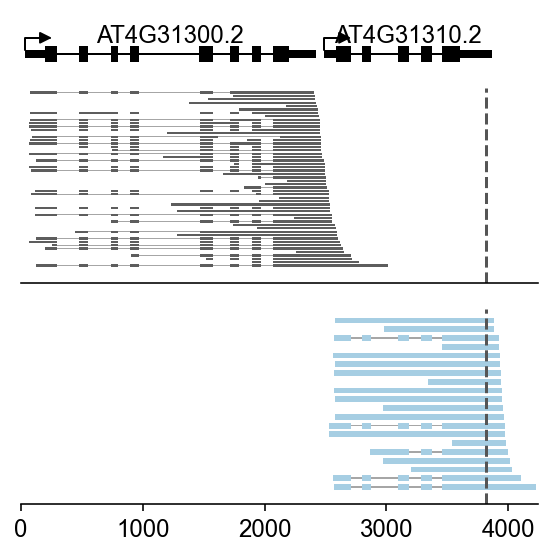

In [16]:
chrom, start, end, strand = '4', 15188731, 15192978, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G31300'},
    end_after=15191089+50
)

igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G31310'},
    end_after=15192554+50
)
#igv_plot.gene_list={'AT4G31300', 'AT4G31310'}
igv_plot.plot(
    height=4, width=4, 
    gene_track_height=1,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

n = 245
n = 146


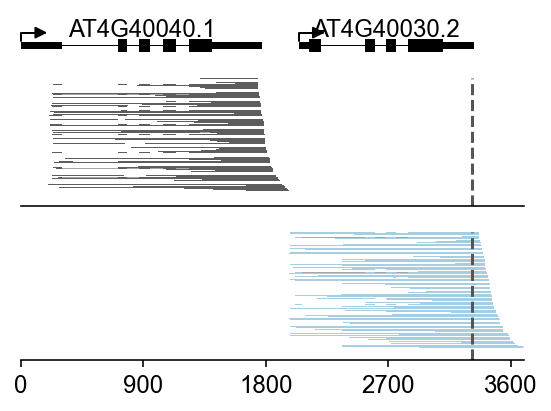

In [78]:
chrom, start, end, strand = '4', 18555248, 18558945, '-'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT4G40030.2', 'AT4G40040.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/_archive/elongating_data/elongating_data.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'

igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G40040'},
    filter_strand='-',
    start_before=18557256-50
)

igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G40030'},
    filter_strand='-',
    start_before=18555631-50
)

#igv_plot.gene_list={'AT5G66070', 'AT5G66080'}
igv_plot.plot(
    height=3, width=4, 
    gene_track_height=1.2,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 139
n = 500


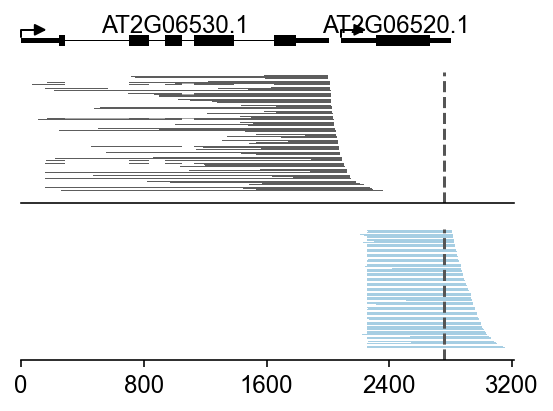

In [74]:
chrom, start, end, strand = '2', 2587320, 2590531, '-'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT2G06530.1', 'AT2G06520.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/_archive/elongating_data/elongating_data.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'

igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT2G06530'},
    filter_strand='-',
    start_before=2588585-50
)

igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT2G06520'},
    filter_strand='-',
    start_before=2587771-50
)

#igv_plot.gene_list={'AT5G66070', 'AT5G66080'}
igv_plot.plot(
    height=3, width=4, 
    gene_track_height=1,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 317
n = 14


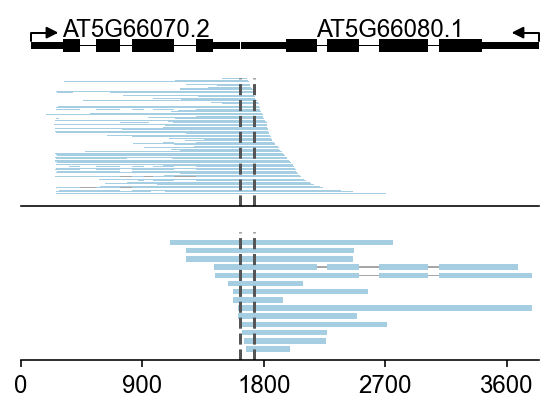

In [79]:
chrom, start, end, strand = '5', 26421610, 26425448, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT5G66070.2', 'AT5G66080.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/_archive/elongating_data/elongating_data.bam'
# infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT5G66070'},
    filter_strand='+',
    end_after=26423232+50
)

igv_plot.add_bam(
    infile,
    method='5_end',
    gene_list={'AT5G66080'},
    filter_strand='-',
    start_before=26423334-50
)
igv_plot.gene_list={'AT5G66070', 'AT5G66080'}
igv_plot.plot(
    height=3, width=4, 
    gene_track_height=1.2,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

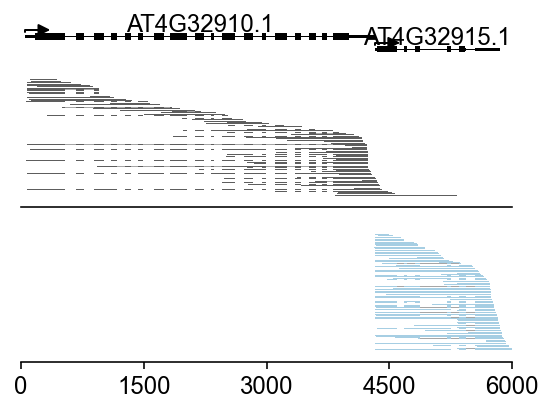

In [94]:
chrom, start, end, strand = '4', 15881198, 15887199, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G32910'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G32915'},
)

igv_plot.plot(
    height=3, width=4, 
    gene_track_height=.5,
    #polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

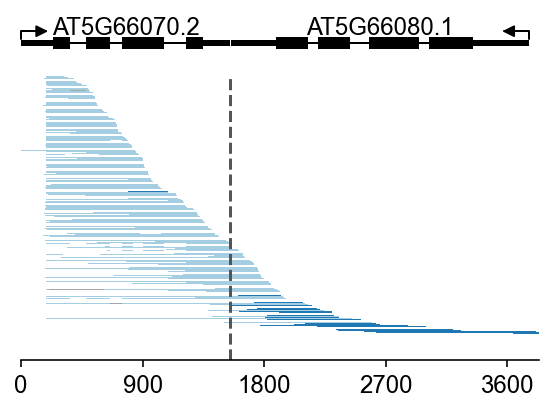

In [65]:
chrom, start, end, strand = '5', 26421686, 26425517, '+'
gene_id = 'AT5G66070'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={gene_id, 'None'},
    subsample=.1,
)

igv_plot.plot(
    height=3, width=4, 
    gene_track_height=.5,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

# tRNA gene downstream

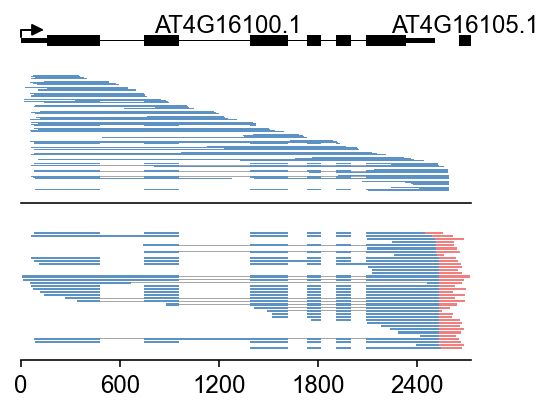

In [134]:
chrom, start, end, strand = '4', 9105653, 9108381, '+'
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end'
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/polyadenylated_data/polyadenylated_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end'
)

igv_plot.plot(height=3, width=4, gene_track_height=1)
plt.tight_layout()
# plt.savefig('a.svg')

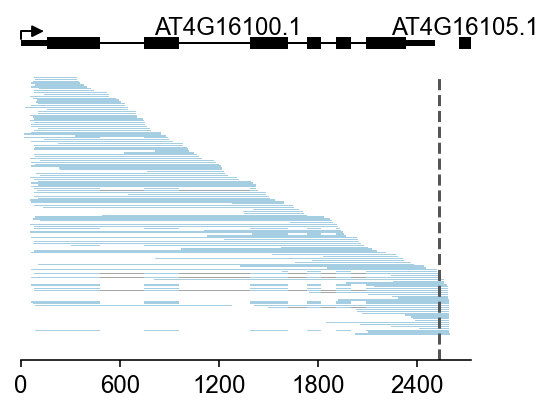

In [175]:
chrom, start, end, strand = '4', 9105653, 9108381, '+'
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/elongating_data.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    gene_list={'AT4G16100'},
)

igv_plot.plot(
    height=3, width=4, 
    gene_track_height=.5,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz'
)
plt.tight_layout()
plt.savefig('a.svg')

n = 100


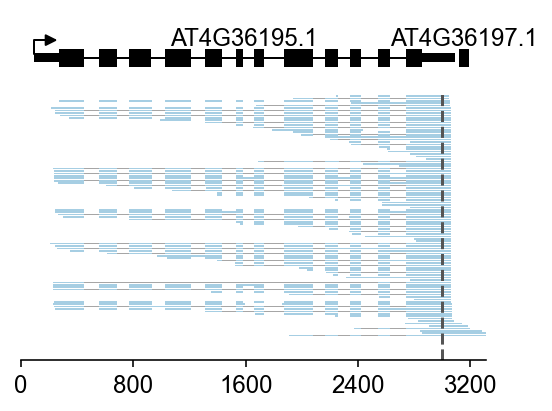

In [85]:
chrom, start, end, strand = '4', 17126932, 17130246, '+'

igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT4G36195.1', 'AT4G36197.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    gene_list = {'AT4G36195'},
    method='3_end',
    end_after=17129929+50,
    start_after=17126932,
    filter_strand=strand
)

# infile = '/public/home/mowp/data/ath_nuclear_RNA/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
# igv_plot.add_bam(
#     infile,
#     method='3_end',
#     filter_rev_pos=5619690,
#     filter_strand=strand
    
# )

igv_plot.plot(
    height=3, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=False,
    gene_track_height=.8
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 86


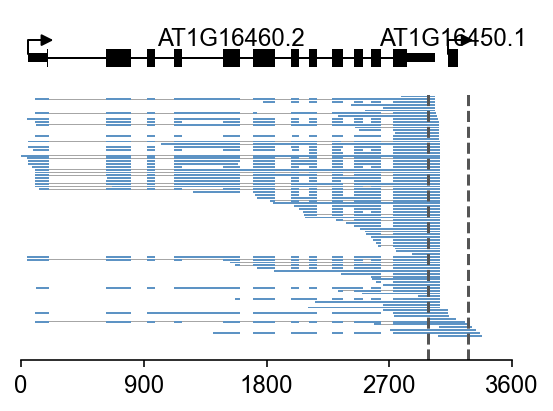

In [84]:
chrom, start, end, strand = '1', 5619471-400, 5622674, '-'
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT1G16460.2', 'AT1G16450.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    start_before=5619690-50,
    filter_strand=strand
)

# infile = '/public/home/mowp/data/ath_nuclear_RNA/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
# igv_plot.add_bam(
#     infile,
#     method='3_end',
#     filter_rev_pos=5619690,
#     filter_strand=strand
    
# )

igv_plot.plot(
    height=3, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=False,
    gene_track_height=.8
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

n = 31


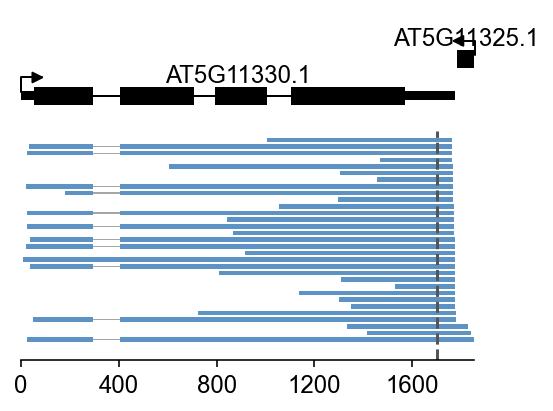

In [83]:
chrom, start, end, strand = '5', 3617058, 3618913, '-'
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT5G11330.1', 'AT5G11325.1'},
)

infile = '/public/home/mowp/workspace/termination/cbRNA_pool/elongating_data/cbRNA.elongating.bam'
igv_plot.add_bam(
    infile,
    method='3_end',
    start_before=3617211-50,
    filter_strand=strand
)

# infile = '/public/home/mowp/data/ath_nuclear_RNA/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
# igv_plot.add_bam(
#     infile,
#     method='3_end',
#     filter_rev_pos=5619690,
#     filter_strand=strand
    
# )

igv_plot.plot(
    height=3, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=False,
    gene_track_height=.8
)
plt.tight_layout()
plt.savefig('a.svg')

for bam_list in igv_plot.bam_list:
    print(f'n = {len(bam_list)}')

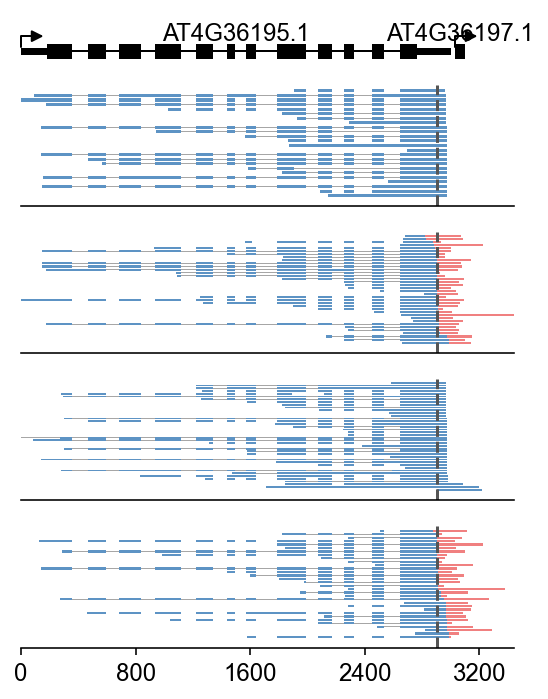

In [208]:
chrom, start, end, strand = '4', 17127022, 17130124, '+'
igv_plot = igv.IGV(chrom, start, end, strand=strand)

# plotting
igv_plot = igv.IGV(chrom, start, end, strand=strand)

araport11_isoform_path = '/public/home/mowp/db/Arabidopsis_thaliana/representative_gene_model/araport11.representative.gene_model.bed.gz'
igv_plot.add_gene_model(
    araport11_isoform_path,
    gene_list = {'AT4G36195.1', 'AT4G36197.1'},
)

infile = '/public/home/mowp/data/ath_cbRNA/cbRNA_2/elongating_data/cb2.elongating.bam'
infile = '/public/home/mowp/data/ath_nuclear_RNA/20210121_col_nuclear/elongating_data/20210121_col_nuclear.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    filter_fwd_pos=17129929+50,
    filter_strand = strand,
)

infile = '/public/home/mowp/data/ath_cbRNA/cbRNA_2/polyadenylated_data/cb2.polyadenylated.bam'
infile = '/public/home/mowp/data/ath_nuclear_RNA/20210121_col_nuclear/polyadenylated_data/merge.polyadenylated.sorted.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    filter_fwd_pos=17129929-50,
    filter_strand = strand,
)

infile = '/public/home/mowp/data/ath_nuclear_RNA/20210301_xrn3/elongating_data/20210301_xrn3.elongating.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    method='3_end',
    filter_fwd_pos=17129929+50,
    filter_strand = strand,
)

infile = '/public/home/mowp/data/ath_nuclear_RNA/20210301_xrn3/polyadenylated_data/20210301_xrn3.polyadenylated.bam'
igv_plot.add_bam(
    infile,
    #gene_list = {gene_id},
    filter_fwd_pos=17129929-50,
    method='3_end',
    filter_strand = strand,
)

igv_plot.plot(
    height=5, width=4,
    polya_site='/public/home/mowp/workspace/termination/cbRNA_pool/polya_sites/cbRNA.last_polya_cluster_summit.bed.gz',
    extend_xlim_end=True,
    gene_track_height=1.5
)
plt.tight_layout()
plt.savefig('a.svg')